# Joshua Espinosa - Project 2

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
import pylab as pl
from scipy import stats
import seaborn as sns
import math as math
import statsmodels.formula.api as smf


admit = pd.read_csv("assets/admissions.csv")

/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Create a table of descriptive statistics for each of the variables (n, mean, median, standard deviation)


In [2]:
admit.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


Read in your dataset, determine how many samples are present, and ID any missing data

<b>Answer: <br>- Both GRE and GPA have two missing data points. <br>- Prestige has one missing data point.<br>- Admit has zero missing data points.</b>


In [3]:
admit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
admit       400 non-null int64
gre         398 non-null float64
gpa         398 non-null float64
prestige    399 non-null float64
dtypes: float64(3), int64(1)
memory usage: 12.6 KB


Describe the distributions of your data <br><b>Answer: <br>- Admit is not normally distributed because it is a dummy variable (either student was admitted or not). It is positively skewed. <br>- GRE is normally distributed with an average score of 588, but has a slightly negative skew. <br>- GPA is normally distributed and has a large negative skew than the other continus variable GRE. <br>- Prestige is not normally distributed and similar to the other categorical variable admit, is positively skewed.</b>


In [4]:
admit.skew()

admit       0.787051
gre        -0.150127
gpa        -0.211765
prestige    0.093663
dtype: float64

Plot box plots for each variable <br><b>(Done Below)</b>


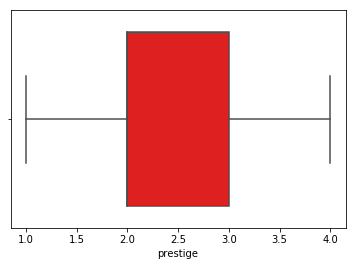

In [5]:
sns.boxplot('prestige', color = 'red' , data = admit)

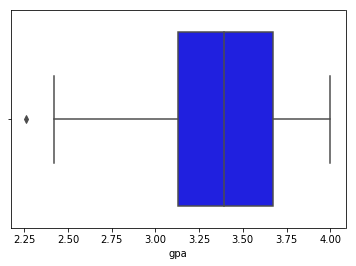

In [6]:
sns.boxplot('gpa', color = 'blue' , data = admit)

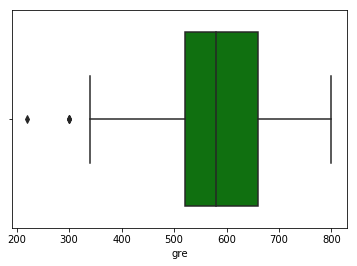

In [7]:
sns.boxplot('gre', color = 'green' , data = admit)

Create a covariance matrix<br>
<b>Done below:</b>


In [8]:
np.cov(admit)

array([[ 35685.06969167,  62096.75800833,  75371.84166667, ...,
         43302.61440833,  65938.77995833,  56455.20239167],
       [ 62096.75800833, 108059.22055833, 131161.05833333, ...,
         75353.59135833, 114744.68720833,  98240.90490833],
       [ 75371.84166667, 131161.05833333, 159203.        , ...,
         91463.19166667, 139276.04166667, 119243.40833333],
       ...,
       [ 43302.61440833,  75353.59135833,  91463.19166667, ...,
         52546.88589167,  80015.68654167,  68507.135175  ],
       [ 65938.77995833, 114744.68720833, 139276.04166667, ...,
         80015.68654167, 121843.94729167, 104319.072125  ],
       [ 56455.20239167,  98240.90490833, 119243.40833333, ...,
         68507.135175  , 104319.072125  ,  89315.088025  ]])

Determine any issues or limitations, based on your exploratory analysis
<br><b>Answer: <br>The limitations to this admissions data are: <br>- Lack of Covariance among variables <br>- Outliers: gpa and gre both have some outliers and I don't know how it would effect the predictive ability of the model.<br>- Missing data points: Each of the variables are missing some data. <br>- Representative sample (number of rows): I am most interested in the profiles of students that were admitted or not and the differences between the two. I'm wondering if this data is representative enough to make impactful insights. <br>


In [9]:
admit1 = smf.ols(formula = 'admit ~ gre + gpa + prestige', data = admit).fit()
admit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  admit   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     13.69
Date:                Wed, 04 Apr 2018   Prob (F-statistic):           1.65e-08
Time:                        21:04:17   Log-Likelihood:                -239.99
No. Observations:                 397   AIC:                             488.0
Df Residuals:                     393   BIC:                             503.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1610      0.218     -0.737      0.462      -0.591       0.269
gre            0.0004      0.000      2.063      0.040    2.05e-05       0.001
gpa            0.1462      0.064      2.296      0.022       0.021       0.271
prestige      -0.1097      0.024     -4.606      0.000      -0.156      -0.063
==============================================================================
Omnibus:                      191.690   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.364
Skew:                           0.670   Prob(JB):                     7.02e-12
Kurtosis:                       1.855   Cond. No.                     6.02e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""